# Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [18]:
!pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
em=pd.read_csv('Elon_musk.csv',error_bad_lines=False,names=['unnamed','Text'])
em

,unnamed,Text
0,NaN,Text
1,1.0,@kunalb11 I�m an alien
2,2.0,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,3.0,@joerogan @Spotify Great interview!
4,4.0,@gtera27 Doge is underestimated
...,...,...
1995,1995.0,"@flcnhvy True, it sounds so surreal, but the n..."
1996,1996.0,@PPathole Make sure to read ur terms &amp; con...
1997,1997.0,@TeslaGong @PPathole Samwise Gamgee
1998,1998.0,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [20]:
em.shape

(2000, 2)

In [27]:
em.head(10)

,unnamed,Text
0,NaN,Text
1,1.0,@kunalb11 I�m an alien
2,2.0,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,3.0,@joerogan @Spotify Great interview!
4,4.0,@gtera27 Doge is underestimated
5,5.0,@teslacn Congratulations Tesla China for amazi...
6,6.0,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7,7.0,"Frodo was the underdoge,\nAll thought he would..."
8,8.0,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
9,9.0,@flcnhvy @anonyx10 Indeed! Tweets definitely d...


In [21]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   unnamed  1999 non-null   float64
 1   Text     2000 non-null   object 
dtypes: float64(1), object(1)
memory usage: 31.4+ KB


In [26]:
em.isna().sum()

unnamed    1
Text       0
dtype: int64

In [29]:
em.describe()

,unnamed
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [30]:
em.duplicated().sum()

0

In [32]:
em.corr()

,unnamed
unnamed,1.0


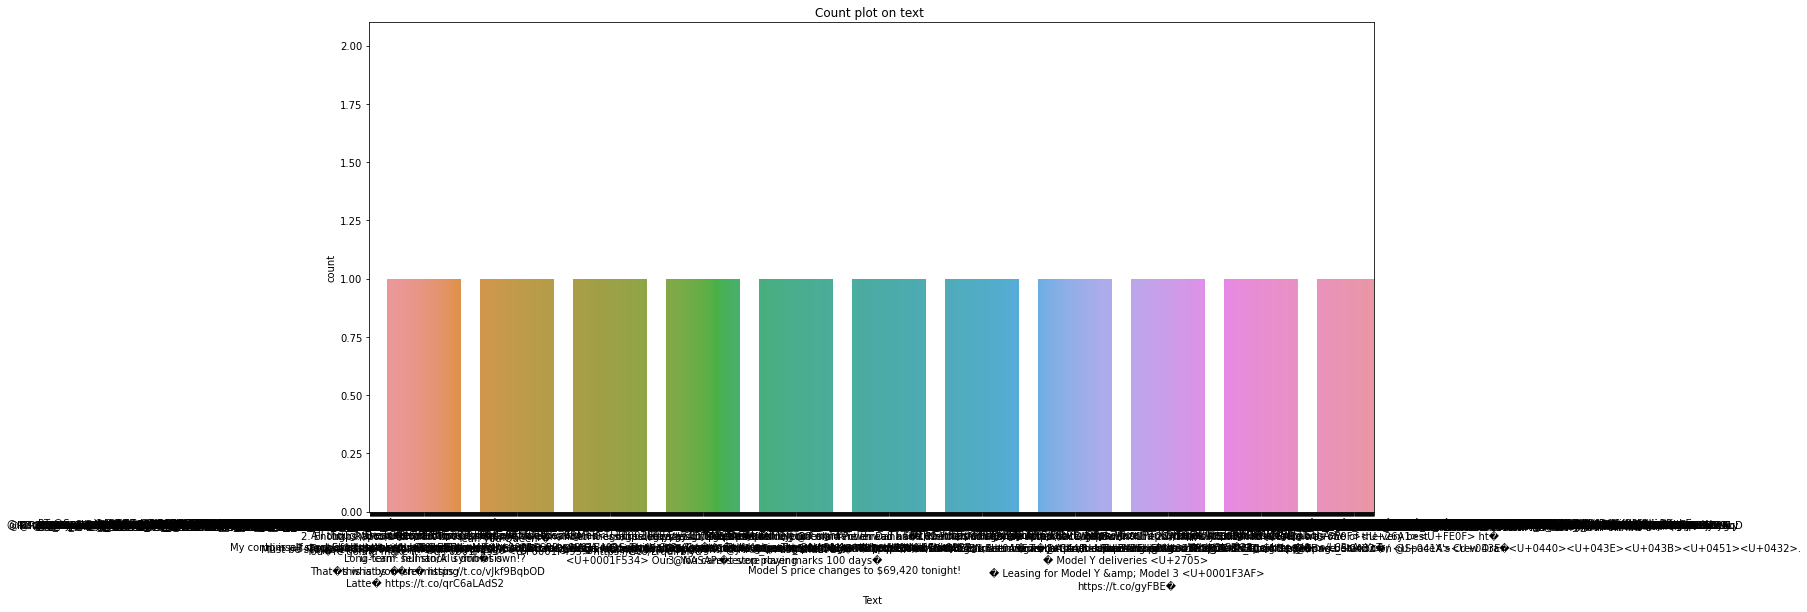

In [37]:
plt.figure(figsize=(18,9))
plt.title('Count plot on text ')
sns.countplot(em['Text']); 

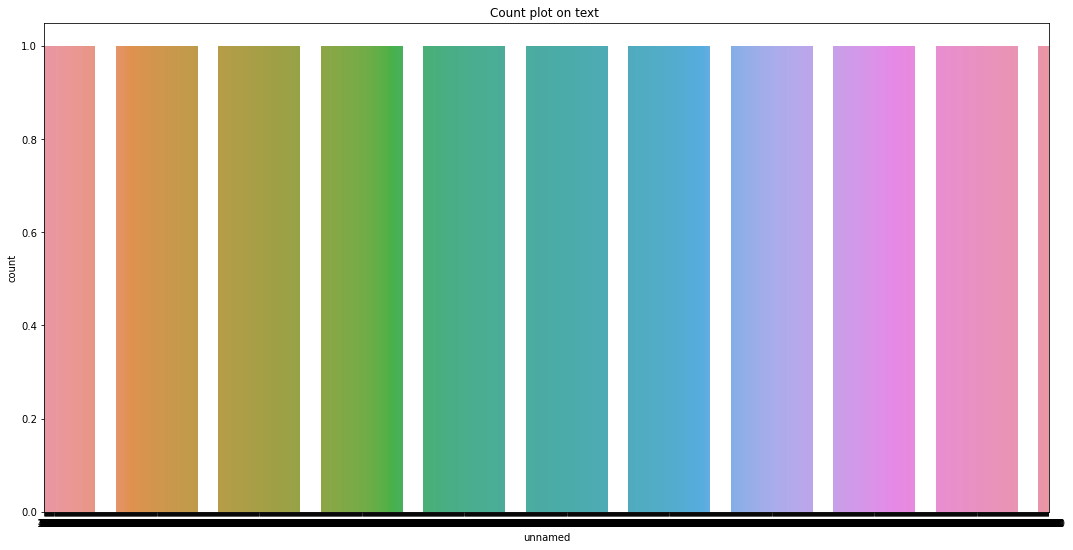

In [42]:
plt.figure(figsize=(18,9))
sns.countplot(em['unnamed']); 

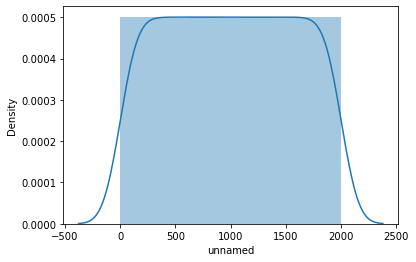

In [47]:
sns.distplot(em['unnamed']);

In [17]:
em['word_count'] = em['Text'].apply(lambda x: len(str(x).split(" ")))
em[['Text','word_count']].head(10)

,Text,word_count
0,Text,1
1,@kunalb11 I�m an alien,4
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
3,@joerogan @Spotify Great interview!,4
4,@gtera27 Doge is underestimated,4
5,@teslacn Congratulations Tesla China for amazi...,17
6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7
7,"Frodo was the underdoge,\nAll thought he would...",12
8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6
9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11


In [63]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

em['avg_word'] = em['Text'].apply(lambda x: avg_word(x))
em[['Text','avg_word']].head(10)


,Text,avg_word
0,@kunalb11 I�m an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,6.142857
6,"Frodo was the underdoge,\nAll thought he would...",5.928571
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6.833333
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,7.181818
9,The most entertaining outcome is the most likely,5.125000


In [64]:
#number of stop words
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

em['stopwords'] = em['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
em[['Text','stopwords']].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,stopwords
0,@kunalb11 I�m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,2
6,"Frodo was the underdoge,\nAll thought he would...",5
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,2
9,The most entertaining outcome is the most likely,4


In [65]:
#number of special characters
em['hastags'] = em['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
em[['Text','hastags']].head(10)

,Text,hastags
0,@kunalb11 I�m an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),3
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,2
9,The most entertaining outcome is the most likely,0


In [66]:
# no of numerical values
em['numerics'] = em['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
em[['Text','numerics']].head(10)

,Text,numerics
0,@kunalb11 I�m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,0


In [67]:
em['upper'] = em['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
em[['Text','upper']].head(10)

,Text,upper
0,@kunalb11 I�m an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,0


In [68]:
em['Text'] = em['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
em['Text'].head()

0                               @kunalb11 i�m an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [69]:
#removing punctuation 
em['Text'] = em['Text'].str.replace('[^\w\s]','')
em['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [70]:
#removing stop words
stop = stopwords.words('english')
em['Text'] = em['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
em['Text'].head()


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [71]:
#removing common words
freq = pd.Series(' '.join(em['Text']).split()).value_counts()[:10]
freq


spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [72]:
freq = list(freq.index)
em['Text'] = em['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
em['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [73]:
#removing rare words
freq = pd.Series(' '.join(em['Text']).split()).value_counts()[-10:]
freq


httpstcozyj8zddfql    1
misperception         1
autonomously          1
jaxzin                1
guy                   1
hansnoordsij          1
httpstco2k8psyqu4j    1
teslalisa             1
httpstcofyuuio5dtz    1
sn27                  1
dtype: int64

In [74]:
freq = list(freq.index)
em['Text'] = em['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
em['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [75]:
em['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [76]:
import nltk
nltk.download('punkt')

TextBlob(em['Text'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [77]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
em['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [78]:
from textblob import Word

import nltk
nltk.download('wordnet')

em['Text'] = em['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
em['Text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Javed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [79]:
TextBlob(em['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

In [80]:
tf1 = (em['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,ray,1
1,nextlevel,1
2,hdr,1
3,tracing,1
4,cyberpunk,1
5,id_aa_carmack,1
6,tried,1


In [81]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(em.shape[0]/(len(em[em['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,ray,1,5.035453
1,nextlevel,1,6.907255
2,hdr,1,6.907255
3,tracing,1,7.600402
4,cyberpunk,1,5.115496
5,id_aa_carmack,1,4.166415
6,tried,1,5.808643


In [82]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,ray,1,5.035453,5.035453
1,nextlevel,1,6.907255,6.907255
2,hdr,1,6.907255,6.907255
3,tracing,1,7.600402,7.600402
4,cyberpunk,1,5.115496,5.115496
5,id_aa_carmack,1,4.166415,4.166415
6,tried,1,5.808643,5.808643


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(em['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7373 stored elements in Compressed Sparse Row format>

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
em_bow = bow.fit_transform(em['Text'])
em_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8019 stored elements in Compressed Sparse Row format>

In [85]:
em['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [86]:
em['sentiment'] = em['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
em[['Text','sentiment']].head(10)

,Text,sentiment
0,kunalb11 im alien,-0.250000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000
2,joerogan spotify interview,0.000000
3,gtera27 doge underestimated,0.000000
4,teslacn congratulation china amazing execution...,0.200000
5,happy new year ox httpstco9wfkmyu2oj,0.468182
6,frodo underdoge thought would fail httpstcozgx...,-0.500000
7,owensparks_ anonyx10 haha thanks,0.200000
8,anonyx10 indeed tweet definitely represent rea...,0.000000
9,entertaining outcome likely,0.250000
